<a href="https://colab.research.google.com/github/shubham10divakar/VGGish-Audio-Embedding-Colab/blob/master/VGGish_Audio_Embedding_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGGish Audio Embedding Colab

This colab demonstrates how to extract the AudioSet embeddings, using a VGGish deep neural network (DNN).

#Importing and Testing the VGGish System

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset

In [0]:
!pip install numpy scipy
!pip install resampy tensorflow six

    100% |████████████████████████████████| 327kB 7.3MB/s 
    100% |████████████████████████████████| 1.9MB 8.0MB/s 
    100% |████████████████████████████████| 15.9MB 1.4MB/s 
  Running setup.py bdist_wheel for resampy ... - done
  Stored in directory: /content/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built resampy


In [0]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Counting objects: 20838, done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20838 (delta 1), reused 3 (delta 0), pack-reused 20822
Receiving objects: 100% (20838/20838), 544.71 MiB | 41.00 MiB/s, done.
Resolving deltas: 100% (12271/12271), done.
Checking out files: 100% (3035/3035), done.


In [0]:
# Check to see where are in the kernel's file system.
!pwd

/content


In [0]:
# Grab the VGGish model
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  92.5M      0  0:00:03  0:00:03 --:--:-- 71.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0  73020      0  0:00:01 --:--:--  0:00:01  240k


In [0]:
# Make sure we got the model data.
!ls

datalab  models  vggish_model.ckpt  vggish_pca_params.npz


In [0]:
# Verify the location of the AudioSet source files
!ls models/research/audioset

mel_features.py		  vggish_input.py	 vggish_slim.py
README.md		  vggish_params.py	 vggish_smoke_test.py
vggish_inference_demo.py  vggish_postprocess.py  vggish_train_demo.py


In [0]:
# Copy the source files to the current directory.
!cp models/research/audioset/* .

In [0]:
# Make sure the source files got copied correctly.
!ls

datalab			  vggish_input.py	 vggish_slim.py
mel_features.py		  vggish_model.ckpt	 vggish_smoke_test.py
models			  vggish_params.py	 vggish_train_demo.py
README.md		  vggish_pca_params.npz
vggish_inference_demo.py  vggish_postprocess.py


In [0]:
# Run the test, which also loads all the necessary functions.
from vggish_smoke_test import *


Testing your install of VGGish

Log Mel Spectrogram example:  [[-4.47297436 -4.29457354 -4.14940631 ... -3.9747003  -3.94774997
  -3.78687669]
 [-4.48589533 -4.28825497 -4.139964   ... -3.98368686 -3.94976505
  -3.7951698 ]
 [-4.46158065 -4.29329706 -4.14905953 ... -3.96442484 -3.94895483
  -3.78619839]
 ...
 [-4.46152626 -4.29365061 -4.14848608 ... -3.96638113 -3.95057575
  -3.78538167]
 [-4.46152595 -4.2936572  -4.14848104 ... -3.96640507 -3.95059567
  -3.78537143]
 [-4.46152565 -4.29366386 -4.14847603 ... -3.96642906 -3.95061564
  -3.78536116]]
INFO:tensorflow:Restoring parameters from vggish_model.ckpt
VGGish embedding:  [0.         0.         0.         0.         0.         0.
 0.         0.16137289 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.8069581
 0.         0.         0.         0.         0.         0.
 0.         0.3679276  0.03582427 0.         0.         0.
 0.         0.3802703  0.13755949 0.91747093 0.8065634  0.
 0.  

#Using the VGGish System

In [0]:
import vggish_slim
import vggish_params
import vggish_input

def CreateVGGishNetwork(hop_size=0.96):   # Hop size is in seconds.
  """Define VGGish model, load the checkpoint, and return a dictionary that points
  to the different tensors defined by the model.
  """
  vggish_slim.define_vggish_slim()
  checkpoint_path = 'vggish_model.ckpt'
  vggish_params.EXAMPLE_HOP_SECONDS = hop_size
  
  vggish_slim.load_vggish_slim_checkpoint(sess, checkpoint_path)

  features_tensor = sess.graph.get_tensor_by_name(
      vggish_params.INPUT_TENSOR_NAME)
  embedding_tensor = sess.graph.get_tensor_by_name(
      vggish_params.OUTPUT_TENSOR_NAME)

  layers = {'conv1': 'vggish/conv1/Relu',
            'pool1': 'vggish/pool1/MaxPool',
            'conv2': 'vggish/conv2/Relu',
            'pool2': 'vggish/pool2/MaxPool',
            'conv3': 'vggish/conv3/conv3_2/Relu',
            'pool3': 'vggish/pool3/MaxPool',
            'conv4': 'vggish/conv4/conv4_2/Relu',
            'pool4': 'vggish/pool4/MaxPool',
            'fc1': 'vggish/fc1/fc1_2/Relu',
            'fc2': 'vggish/fc2/Relu',
            'embedding': 'vggish/embedding',
            'features': 'vggish/input_features',
         }
  g = tf.get_default_graph()
  for k in layers:
    layers[k] = g.get_tensor_by_name( layers[k] + ':0')
    
  return {'features': features_tensor,
          'embedding': embedding_tensor,
          'layers': layers,
         }

In [0]:
def ProcessWithVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a whitened version of the embeddings. Sound must be scaled to be
  floats between -1 and +1.'''

  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])

  [embedding_batch] = sess.run([vgg['embedding']],
                               feed_dict={vgg['features']: input_batch})

  # Postprocess the results to produce whitened quantized embeddings.
  pca_params_path = 'vggish_pca_params.npz'

  pproc = vggish_postprocess.Postprocessor(pca_params_path)
  postprocessed_batch = pproc.postprocess(embedding_batch)
  # print('Postprocessed VGGish embedding: ', postprocessed_batch[0])
  return postprocessed_batch[0]


In [0]:
# Test these new functions with the original test.
import tensorflow as tf
tf.reset_default_graph()
sess = tf.Session()

vgg = CreateVGGishNetwork(0.01)

# Generate a 1 kHz sine wave at 44.1 kHz (we use a high sampling rate
# to test resampling to 16 kHz during feature extraction).
num_secs = 3
freq = 1000
sr = 44100
t = np.linspace(0, num_secs, int(num_secs * sr))
x = np.sin(2 * np.pi * freq * t)  # Unit amplitude input signal

postprocessed_batch = ProcessWithVGGish(vgg, x, sr)

# print('Postprocessed VGGish embedding: ', postprocessed_batch[0])
expected_postprocessed_mean = 123.0
expected_postprocessed_std = 75.0
np.testing.assert_allclose(
    [np.mean(postprocessed_batch), np.std(postprocessed_batch)],
    [expected_postprocessed_mean, expected_postprocessed_std],
    rtol=rel_error)


INFO:tensorflow:Restoring parameters from vggish_model.ckpt


In [0]:
def EmbeddingsFromVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a dictionary of embeddings from the different layers
  of the model.'''
  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])

  layer_names = vgg['layers'].keys()
  tensors = [vgg['layers'][k] for k in layer_names]
  
  results = sess.run(tensors,
                     feed_dict={vgg['features']: input_batch})

  resdict = {}
  for i, k in enumerate(layer_names):
    resdict[k] = results[i]
    
  return resdict

In [0]:
resdict = EmbeddingsFromVGGish(vgg, x, sr)

In [0]:
for k in resdict:
  print k, resdict[k].shape

fc1 (203, 4096)
fc2 (203, 128)
features (203, 96, 64)
conv3 (203, 24, 16, 256)
conv2 (203, 48, 32, 128)
conv1 (203, 96, 64, 64)
embedding (203, 128)
conv4 (203, 12, 8, 512)
pool3 (203, 12, 8, 256)
pool2 (203, 24, 16, 128)
pool1 (203, 48, 32, 64)
pool4 (203, 6, 4, 512)


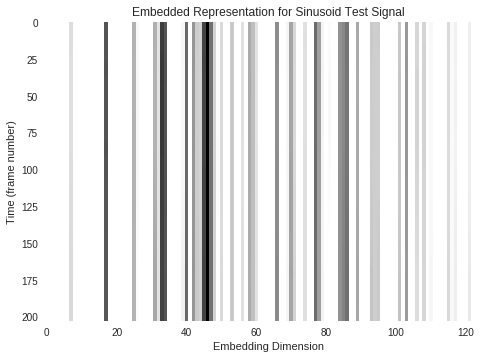

In [0]:
import matplotlib.pyplot as plt
plt.imshow(resdict['embedding'], 
           aspect='auto', cmap='binary')
plt.xlabel('Embedding Dimension')
plt.ylabel('Time (frame number)')
plt.title('Embedded Representation for Sinusoid Test Signal')
plt.grid(False);

#Showing the graph

In [0]:
# Note : Tested with Chrome 66 -- might not work with all browsers :-(

# Let's visualize our graph!
# Tip: to make your graph more readable you can add a
# name="..." parameter to the individual Ops.

# src: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

import numpy as np
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [0]:
show_graph(tf.get_default_graph())